# WORLD HAPPINESS REPORT
__Context__ \
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

__Inspiration__ \
Q1) What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness? \
Q2) How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports? \
Q3) Did any country experience a significant increase or decrease in happiness?

TR \
Q1) Hangi ülkeler veya bölgeler genel mutlulukta ve mutluluğa katkıda bulunan altı faktörün her birinde en yüksek sırada yer alıyor? \
Q2) 2015-2016 ile 2016-2017 raporları arasında ülke sıralamaları veya puanları nasıl değişti? \
Q3) Herhangi bir ülke mutlulukta önemli bir artış veya azalma yaşadı mı? 

Data from: https://www.kaggle.com/unsdsn/world-happiness

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1) Reading Data

Reading data between 2015 and 2017.

In [2]:
pwd = os.getcwd()
org_data_2015 = pd.read_csv(pwd + "\\2015.csv")
org_data_2016 = pd.read_csv(pwd + "\\2016.csv")
org_data_2017 = pd.read_csv(pwd + "\\2017.csv")

Copying data for possible changes.

In [3]:
data_2015 = org_data_2015.copy()
data_2016 = org_data_2016.copy()
data_2017 = org_data_2017.copy()

Data info. \
-There is no null row. \
-There are equals number of rows for every year(158). \
-Each dataset has 12 columns. 

## 2) Data Manipulation

__2.1) Removing unused columns.__

In [4]:
data_2015.drop(columns=["Standard Error"], inplace=True)
data_2016.drop(columns=["Lower Confidence Interval", "Upper Confidence Interval"], inplace=True)
data_2017.drop(columns=["Whisker.high", "Whisker.low"], inplace=True)

__2.2) Adding region column to the 2017 dataset and changing name of 2017 columns.__

In [5]:
data_2017 = pd.merge(left=data_2017, right=data_2015.iloc[:, :2], how="left",  left_on="Country", right_on="Country")

In [6]:
data_2017.insert(1, "Region1", data_2017["Region"])

In [7]:
data_2017.drop(columns="Region", inplace=True)

In [8]:
data_2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual'],
      dtype='object')

In [9]:
data_2017 = data_2017.rename(columns={'Country': 'Country', 
                   'Region1': 'Region',
                   'Happiness.Rank': 'Happiness Rank',
                   'Happiness.Score': 'Happiness Score',
                   'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)', 
                   'Health..Life.Expectancy.': 'Health (Life Expectancy)', 
                   'Freedom': 'Freedom',
                   'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                    'Dystopia.Residual': 'Dystopia Residual'
                  })


__2.3) Mapping countries in datasets(2015-2016-2017).__

In [10]:
def drop_diff_country(control_data, update_data):
    for i in update_data.Country.unique():
        if i not in control_data.Country.unique():
            print(i)
            update_data = update_data[update_data.Country != i ]
    return update_data

In [11]:
data_2017 = drop_diff_country(data_2016, data_2017)
data_2016 = drop_diff_country(data_2017, data_2016)
data_2017 = drop_diff_country(data_2015, data_2017)
data_2015 = drop_diff_country(data_2017, data_2015)
data_2016 = drop_diff_country(data_2015, data_2016)
data_2015 = drop_diff_country(data_2016, data_2015)

Taiwan Province of China
Hong Kong S.A.R., China
Mozambique
Lesotho
Central African Republic
Puerto Rico
Taiwan
Suriname
Hong Kong
Somaliland Region
Laos
Comoros
Belize
Somalia
Namibia
South Sudan
Oman
Taiwan
Suriname
Hong Kong
Somaliland region
Mozambique
Lesotho
Laos
Swaziland
Djibouti
Comoros
Central African Republic
Belize
Somalia
Namibia
South Sudan


__2.4) Control and drop null values.__

In [112]:
data_2015.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [113]:
data_2016.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [114]:
data_2017.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Generosity                       0
Trust (Government Corruption)    0
Dystopia Residual                0
dtype: int64

__2.5) Concat all data to analysis by "Region".__

In [115]:
all_data = pd.concat((data_2015, data_2016, data_2017)) #alldata to control
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 0 to 153
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        438 non-null    object 
 1   Region                         438 non-null    object 
 2   Happiness Rank                 438 non-null    int64  
 3   Happiness Score                438 non-null    float64
 4   Economy (GDP per Capita)       438 non-null    float64
 5   Family                         438 non-null    float64
 6   Health (Life Expectancy)       438 non-null    float64
 7   Freedom                        438 non-null    float64
 8   Trust (Government Corruption)  438 non-null    float64
 9   Generosity                     438 non-null    float64
 10  Dystopia Residual              438 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 41.1+ KB


## 3)Visualization Data

#### 3.1) Histogram

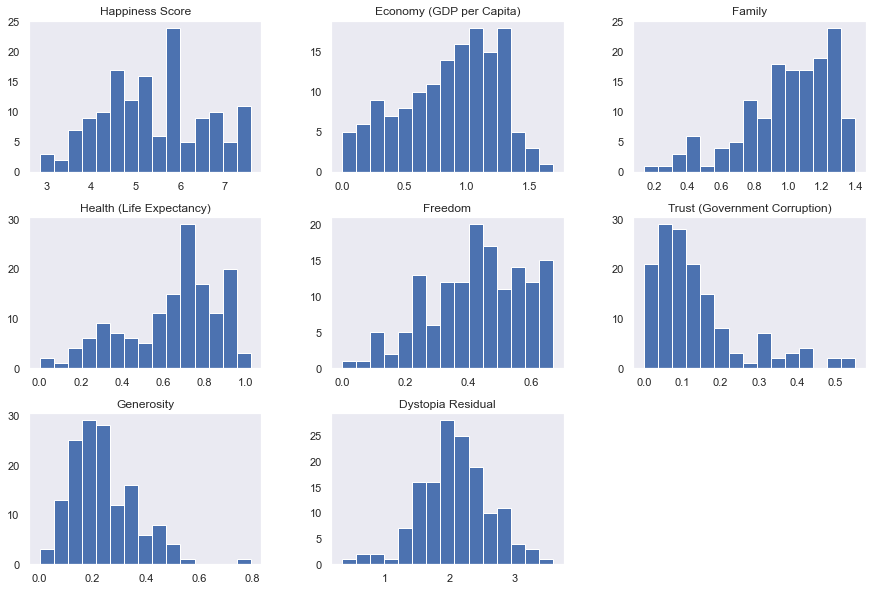

In [64]:
sns.set()
data_2015.iloc[: , 3:].hist(bins=15, figsize=(15,10), grid=False,)
plt.show()

#### 3.2) Density Function

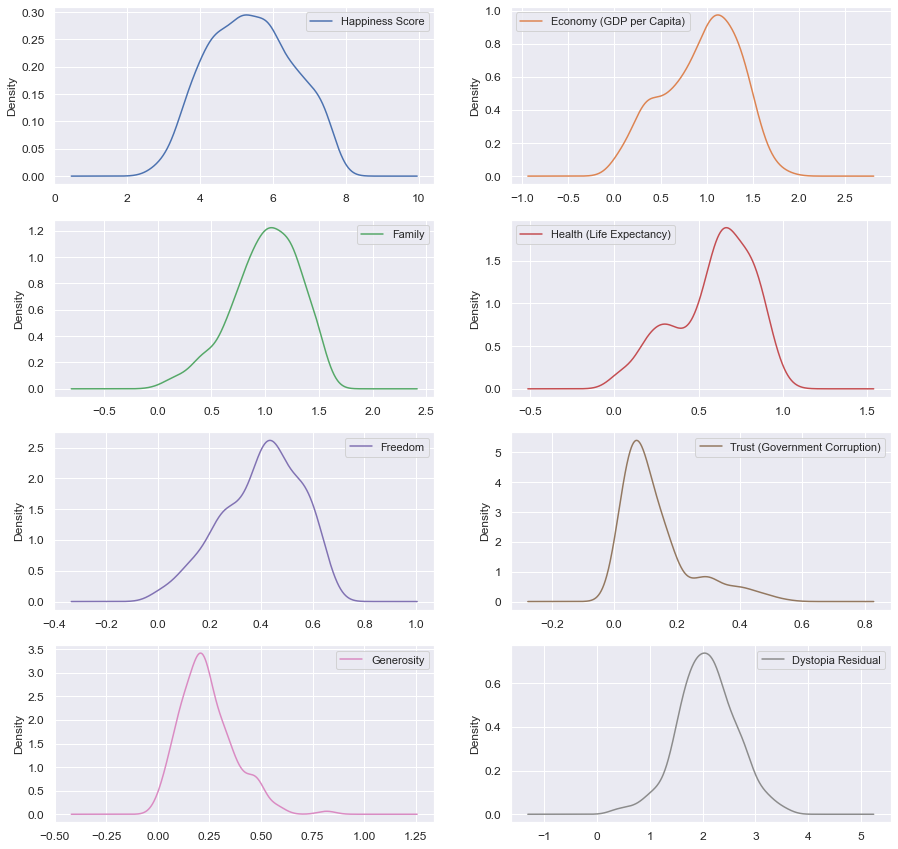

In [60]:
all_data.iloc[: , 3:].plot(kind= 'density', subplots=True, layout=(4,2), sharex=False, sharey=False, fontsize=12, 
                           figsize=(15,15))
plt.show()

#### 3.3) Box plot

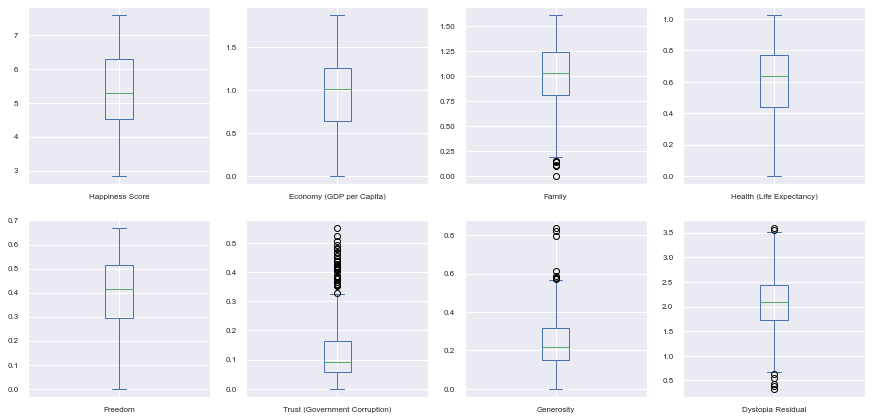

In [61]:
all_data.iloc[: , 3:].plot(kind= 'box' , subplots=True, layout=(4,4), sharex=False, sharey=False,fontsize=8, figsize=(15,15))
plt.show()

### Q1-What countries or regions rank the highest in overall happiness and each of the six factors contributing to happiness?

Q1.1) When the happiness data is analyzed by __region,__ "Australia and New Zealand" came in the top rank in all other titles except for the "Economy (GDP per Capita)" factor.

In [131]:
#comparing by Region in all_data
all_data_group = all_data.groupby(by="Region").mean()

In [132]:
def bar_chart(data, rating_col, year=None ):
    #data manipulation
    data.sort_values(by=rating_col, ascending=False, inplace=True)
    group_col_l = data.sort_values(by=rating_col, ascending=False).index.to_list()
    rating_col_l = data[rating_col]
    
    #chart dimensions
    fig, ax = plt.subplots(figsize =(10, 5))

    # Horizontal Bar Plot
    ax.barh(group_col_l, rating_col_l, color="C0")

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax.spines[s].set_visible(False)

    # Remove x, y Ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')

    # Add padding between axes and labels
    ax.xaxis.set_tick_params(pad = 5)
    ax.yaxis.set_tick_params(pad = 10)

    # Add x, y gridlines
    ax.grid(b = True, color ='grey', linestyle ='-.', linewidth = 1, alpha = 0.4)

    # Show top values
    ax.invert_yaxis()

    # Add annotation to bars
    for i in ax.patches:
        plt.text(i.get_width()+0.01, i.get_y()+0.5, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold', color ='grey')

    # Add Plot Title
    ax.set_title(f'Bar Chart of {rating_col} for Region ({year})', loc ='left', )

    # Add Text watermark
    fig.text(0.95, 0.075, 'Rating', fontsize = 10, color ='black', ha ='right', va ='bottom', alpha = 0.7)

    plt.show()

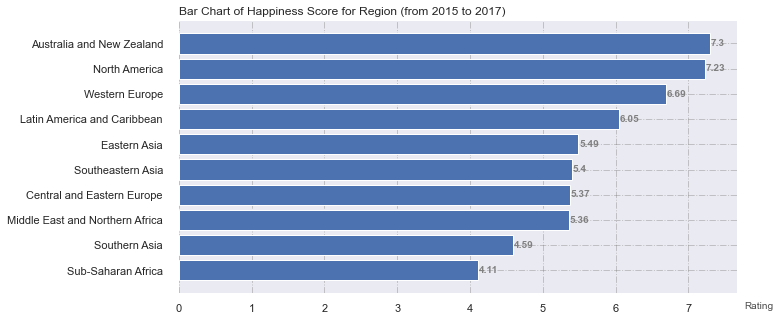

In [133]:
bar_chart(all_data_group, "Happiness Score", "from 2015 to 2017")

According to the graph, the region that comes first in overall happiness is __"Australia and New Zealand".__

---------------------------------------------

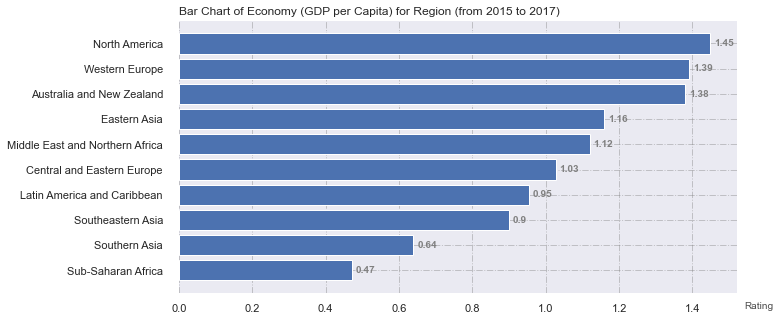

In [134]:
bar_chart(all_data_group, "Economy (GDP per Capita)", "from 2015 to 2017")

According to the graph, the region that comes first in Economy (GDP per Capita) is __"North America".__

---------------------------------------------

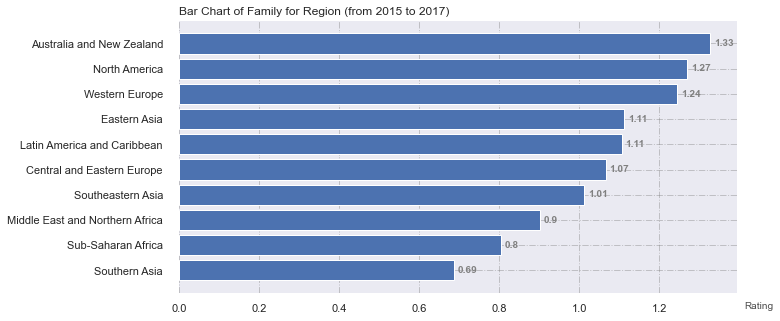

In [82]:
bar_chart(all_data_group, "Family", "from 2015 to 2017" )

According to the graph, the region that comes first in Family is __"Australia and New Zealand".__

---------------------------------------------

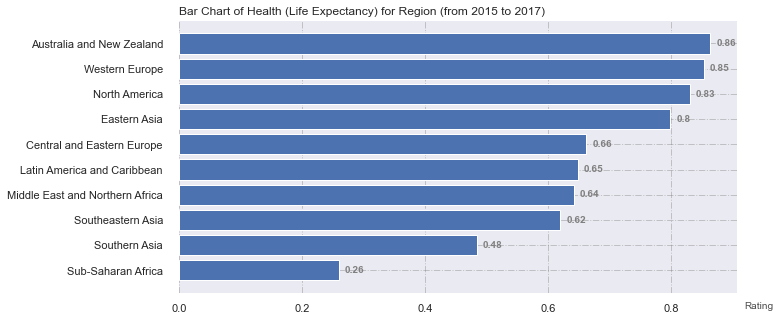

In [83]:
bar_chart(all_data_group, "Health (Life Expectancy)", "from 2015 to 2017" )

According to the graph, the region that comes first in Health (Life Expectancy) is __"Australia and New Zealand".__

---------------------------------------------

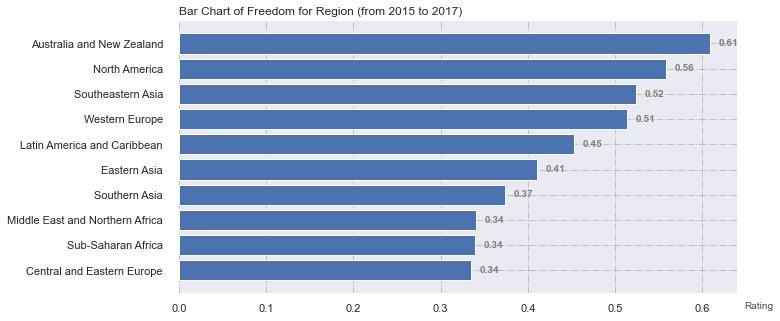

In [84]:
bar_chart(all_data_group, "Freedom", "from 2015 to 2017" )

According to the graph, the region that comes first in Freedom is __"Australia and New Zealand".__

---------------------------------------------

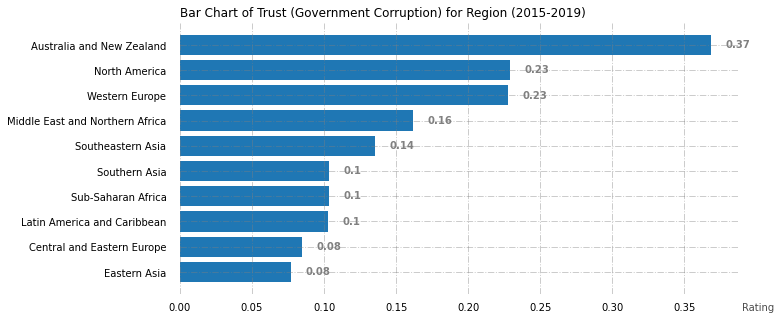

In [26]:
bar_chart(all_data_group, "Trust (Government Corruption)", "from 2015 to 2017" )

According to the graph, the region that comes first in Trust (Government Corruption) is __"Australia and New Zealand".__

---------------------------------------------

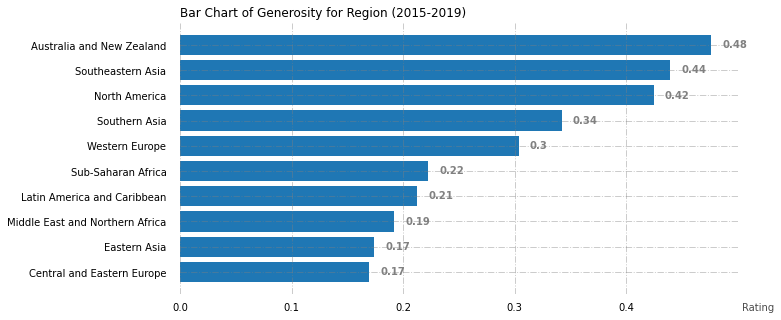

In [27]:
bar_chart(all_data_group, "Generosity", "from 2015 to 2017" )

According to the graph, the region that comes first in Generosity is __"Australia and New Zealand".__

---------------------------------------------

Q1.2) The rankings of __the countries according to all factors__ were examined by taking the average of 5 years.

In [28]:
all_data.groupby(by="Country").mean().sort_values(by="Happiness Rank").head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.442957,0.352793,2.515046
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.399606,0.289386,2.496242
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.148242,0.462873,2.618698
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.346251,0.362651,2.468996
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.402124,0.244638,2.625231


In [29]:
all_data.groupby(by="Country").mean().sort_values(by="Happiness Score", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.399606,0.289386,2.496242
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.442957,0.352793,2.515046
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.148242,0.462873,2.618698
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.346251,0.362651,2.468996
Finland,5.333333,7.429333,1.379934,1.331049,0.836393,0.610227,0.402124,0.244638,2.625231


In [30]:
all_data.groupby(by="Country").mean().sort_values(by="Economy (GDP per Capita)", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Qatar,33.000000,6.453667,1.795152,1.077512,0.741553,0.603774,0.480623,0.326695,1.428148
Luxembourg,18.333333,6.893333,1.667791,1.239068,0.869816,0.587053,0.350035,0.279744,1.899891
Singapore,24.000000,6.703000,1.619896,1.080465,0.973977,0.526687,0.475426,0.328025,1.698374
Kuwait,39.666667,6.213000,1.601437,1.101073,0.664239,0.494329,0.235980,0.183407,1.932538
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.346251,0.362651,2.468996


In [31]:
all_data.groupby(by="Country").mean().sort_values(by="Family", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Iceland,2.666667,7.522000,1.403204,1.398688,0.882907,0.607391,0.148242,0.462873,2.618698
Ireland,17.333333,6.941333,1.451692,1.363094,0.839888,0.576987,0.294319,0.445499,1.969816
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.442957,0.352793,2.515046
Uzbekistan,46.666667,5.987000,0.718264,1.352500,0.532541,0.641646,0.279373,0.329205,2.133568
New Zealand,8.333333,7.311333,1.338849,1.346882,0.852030,0.611637,0.410359,0.489675,2.262079


In [32]:
all_data.groupby(by="Country").mean().sort_values(by="Health (Life Expectancy)", ascending=True).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Sierra Leone,113.333333,4.617000,0.354504,0.855949,0.001855,0.344649,0.080305,0.248964,2.730857
Chad,143.333333,3.788667,0.400694,0.782085,0.076492,0.175141,0.051931,0.195548,2.106856
Ivory Coast,139.333333,3.917000,0.541153,0.750563,0.081751,0.440999,0.154861,0.202089,1.745658
Angola,139.333333,3.898000,0.821173,0.876157,0.088870,0.036577,0.075093,0.114025,1.886154
Nigeria,92.000000,5.072333,0.730089,0.921690,0.089355,0.338944,0.032307,0.245156,2.714814


In [33]:
all_data.groupby(by="Country").mean().sort_values(by="Freedom", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Uzbekistan,46.666667,5.987000,0.718264,1.352500,0.532541,0.641646,0.279373,0.329205,2.133568
Norway,3.000000,7.519000,1.550968,1.330458,0.825889,0.633748,0.346251,0.362651,2.468996
Cambodia,138.000000,3.964667,0.539395,0.723699,0.488621,0.628119,0.073832,0.397634,1.113540
Switzerland,2.333333,7.530000,1.496273,1.337221,0.887530,0.623737,0.399606,0.289386,2.496242
Sweden,9.000000,7.313000,1.425969,1.284957,0.857652,0.618301,0.410503,0.376853,2.338689


In [34]:
all_data.groupby(by="Country").mean().sort_values(by="Trust (Government Corruption)", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Rwanda,152.333333,3.483667,0.306429,0.778422,0.357905,0.572351,0.504113,0.238185,0.726224
Qatar,33.000000,6.453667,1.795152,1.077512,0.741553,0.603774,0.480623,0.326695,1.428148
Singapore,24.000000,6.703000,1.619896,1.080465,0.973977,0.526687,0.475426,0.328025,1.698374
Denmark,2.000000,7.525000,1.416548,1.358481,0.820749,0.618266,0.442957,0.352793,2.515046
Sweden,9.000000,7.313000,1.425969,1.284957,0.857652,0.618301,0.410503,0.376853,2.338689


In [136]:
all_data.groupby(by="Country").mean().sort_values(by="Generosity", ascending=False).head()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,,,,,,,,,
Myanmar,120.666667,4.415667,0.326437,0.844032,0.426261,0.460527,0.193862,0.817888,1.346630
Thailand,33.000000,6.451000,1.061356,1.245201,0.678296,0.544124,0.030604,0.578461,2.312853
Indonesia,78.000000,5.325000,0.924950,1.079258,0.541339,0.433934,0.006179,0.564088,1.775059
Malta,31.333333,6.439000,1.286167,1.296411,0.837435,0.580786,0.154822,0.551540,1.731994
United Kingdom,21.000000,6.768667,1.370278,1.289553,0.841559,0.534933,0.286696,0.504485,1.941358


### Q2) How did country ranks or scores change between the 2015 and 2016 as well as the 2016 and 2017 reports?

In [144]:
    #Empirical Cumulative Distribution Graph, for practical purposes, or
    #"from statsmodels.distributions.empirical_distribution import ECDF", we can use the module.
    def ecdf(data):
        """Compute ECDF for a one-dimensional array of measurements."""
        # Number of data points: n
        n = len(data)

        # x-data for the ECDF: x
        x = np.sort(data)

        # y-data for the ECDF: y
        y = np.arange(1, len(x)+1) / len(x)

        return x, y
    
    
    
    def bootstrap_replicate_1d(data, func):
        """Generate bootstrap replicate of 1D data."""
        bs_sample = np.random.choice(data, len(data))
        return func(bs_sample)

    
    def draw_bs_reps(data, func, size=1):
        """Draw bootstrap replicates."""

        # Initialize array of replicates: bs_replicates
        bs_replicates = np.empty(size)

        # Generate replicates
        for i in range(size):
            bs_replicates[i] = bootstrap_replicate_1d(data, func)

        return bs_replicates

#### Q2.1) Comparing for 2015-2016 (Happiness Rank)
First, the difference was examined with the ECDF graph.

In [178]:
#slicing data to analyze Happiness Rank changes
x_data2015 = data_2015.set_index("Country")["Happiness Rank"].sort_index()
y_data2016 = data_2016.set_index("Country")["Happiness Rank"].sort_index()

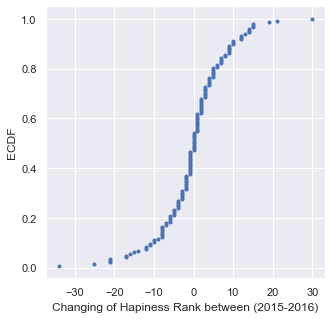

In [179]:
#rate of change between years
f_rank = x_data2015 - y_data2016

#ECDF
x, y = ecdf(f_rank)

#plot
sns.set()
plt.figure(figsize=(5,5))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Changing of Hapiness Rank between (2015-2016)")
plt.ylabel("ECDF")
plt.show()

Between 2015 and 2016, countries seem to have lost more ranks, but we can say that there is not very big differences. With their optimal parameters, we can better understand this.

In [180]:
bs_replicates = draw_bs_reps(f_rank, np.mean, 10000)

f_conf = np.percentile(bs_replicates, [2.5, 97.5])

print("""Fractional Changing 2015-2016 mean   : {0:.5f}
Fractional Changing 2015-2016 mean CI: [{1:.5f}, {2:.5f}]""".format(np.mean(f_rank) , *f_conf))

Fractional Changing 2015-2016 mean   : -0.15753
Fractional Changing 2015-2016 mean CI: [-1.56164, 1.25342]


With a very small difference, a decline in the mean rank of the countries was observed. We'll do a hypothesis test to be sure.

Null Hypothesis: There is no difference the mean of change in "Happiness Ranking" of the countries between 2015 and 2016.

In [181]:
# Shift f: f_shift
f_shift = f_rank - np.mean(f_rank)

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum( bs_reps >= np.mean(f_rank)) / 100000
print('p =', p_val)

p = 0.58783


The p-value is large, about 0.59, at the 95% confidence interval, there is no difference in the mean of change in "Happiness Rank" of countries between 2015 and 2016.

#### Q2.2) Comparing for 2015-2016 (Happiness Score)

In [182]:
#slicing data to analyze Happiness Score changes
x_data2015 = data_2015.set_index("Country")["Happiness Score"].sort_index()
y_data2016 = data_2016.set_index("Country")["Happiness Score"].sort_index()

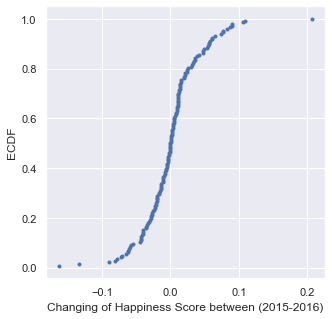

In [183]:
#rate of change between years
f_score = (x_data2015 - y_data2016)/x_data2015

#ECDF
x, y = ecdf(f_score)

#plot
sns.set()
plt.figure(figsize=(5,5))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Changing of Happiness Score between (2015-2016)")
plt.ylabel("ECDF")
plt.show()

In [184]:
bs_replicates = draw_bs_reps(f_score, np.mean, 10000)

f_conf = np.percentile(bs_replicates, [2.5, 97.5])

print("""Fractional Changing 2015-2016 mean   : {0:.5f}
Fractional Changing 2015-2016 mean CI: [{1:.5f}, {2:.5f}]""".format(np.mean(f_score ), *f_conf))

Fractional Changing 2015-2016 mean   : 0.00088
Fractional Changing 2015-2016 mean CI: [-0.00642, 0.00840]


With a very small difference, an increase in the mean of change in "Happiness Score" of the countries was observed. We'll do a hypothesis test to be sure.

Null Hypothesis: There is no difference the mean of change in "Happiness Score"  of the countries between 2015 and 2016.

In [186]:
# Shift f: f_shift
f_shift = f_score - np.mean(f_score)

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum( bs_reps >= np.mean(f_score)) / 100000
print('p = {0:.5f}'.format(p_val))

p = 0.40464


The p-value is large, about 0.40, at the 95% confidence interval, there is no difference in the mean of change in "Happiness Score" of countries between 2015 and 2016.

#### Q2.3) Comparing for 2016-2017 (Happiness Rank)

In [191]:
#slicing data to analyze Happiness Rank changes
x_data2016 = data_2016.set_index("Country")["Happiness Rank"].sort_index()
y_data2017 = data_2017.set_index("Country")["Happiness Rank"].sort_index()

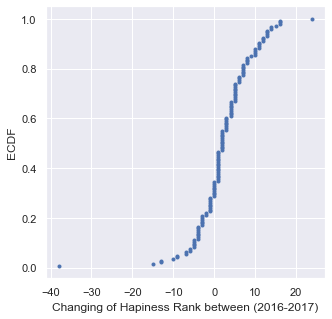

In [192]:
#rate of change between years
f_rank = x_data2016 - y_data2017

#ECDF
x, y = ecdf(f_rank)

#plot
sns.set()
plt.figure(figsize=(5,5))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Changing of Hapiness Rank between (2016-2017)")
plt.ylabel("ECDF")
plt.show()

Between 2016 and 2017, countries seem to have gain more ranks, but we can say that there is a small difference. With their optimal parameters, we can better understand this.

In [193]:
bs_replicates = draw_bs_reps(f_rank, np.mean, 10000)

f_conf = np.percentile(bs_replicates, [2.5, 97.5])

print("""Fractional Changing 2015-2016 mean   : {0:.5f}
Fractional Changing 2015-2016 mean CI: [{1:.5f}, {2:.5f}]""".format(np.mean(f_rank) , *f_conf))

Fractional Changing 2015-2016 mean   : 2.30822
Fractional Changing 2015-2016 mean CI: [1.14384, 3.43151]


With a small difference, an increase in the mean of change in "Happiness Rank" of the countries was observed. We'll do a hypothesis test to be sure.

Null Hypothesis: There is no difference the mean of change in "Happiness Rank"  of the countries between 2016 and 2017.

In [194]:
# Shift f: f_shift
f_shift = f_rank - np.mean(f_rank)

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum( bs_reps >= np.mean(f_rank)) / 100000
print('p = {0:.5f}'.format(p_val))

p = 0.00005


The p-value is smaller than 0.05, at the 95% confidence interval, there is a significant difference in the mean "Happiness Rank" of countries between 2016 and 2017 (Ho reject).

#### Q2.4) Comparing for 2016-2017 (Happiness Score)

In [195]:
#slicing data to analyze Happiness Score changes
x_data2016 = data_2016.set_index("Country")["Happiness Score"].sort_index()
y_data2017 = data_2017.set_index("Country")["Happiness Score"].sort_index()

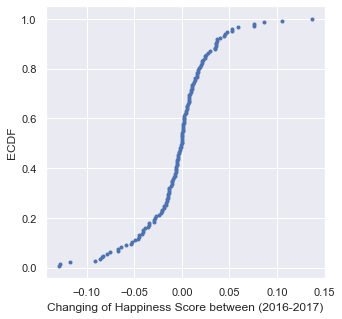

In [196]:
#rate of change between years
f_score = (x_data2016 - y_data2017) / x_data2016

#ECDF
x, y = ecdf(f_score)

#plot
sns.set()
plt.figure(figsize=(5,5))
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Changing of Happiness Score between (2016-2017)")
plt.ylabel("ECDF")
plt.show()

Between 2016 and 2017, we can say that there is not very big differences. With their optimal parameters, we can better understand this.

In [197]:
bs_replicates = draw_bs_reps(f_score, np.mean, 10000)

f_conf = np.percentile(bs_replicates, [2.5, 97.5])

print("""Fractional Changing 2015-2016 mean   : {0:.5f}
Fractional Changing 2015-2016 mean CI: [{1:.5f}, {2:.5f}]""".format(np.mean(f_score) , *f_conf))

Fractional Changing 2015-2016 mean   : -0.00417
Fractional Changing 2015-2016 mean CI: [-0.01065, 0.00221]


With a very small difference, a decline in the mean of change in "Happiness Score" of the countries was observed. We'll do a hypothesis test to be sure.

Null Hypothesis: There is no difference the mean of change in "Happiness Score"  of the countries between 2016 and 2017.

In [199]:
# Shift f: f_shift
f_shift = f_score + np.mean(f_score)

# Draw 100,000 bootstrap replicates of the mean: bs_reps
bs_reps = draw_bs_reps(f_shift, np.mean, 100000)

# Compute and report the p-value
p_val = np.sum( bs_reps >= np.mean(f_score)) / 100000
print('p = {0:.5f}'.format(p_val))

p = 0.09622


The p-value is slightly greater than 0.05. At the 95% confidence interval, there is no difference in  mean of change in the "Happiness Score" of countries between 2015 and 2016 (I tried the function with size = 1000000 and the result was 0.096).

## Q3) Did any country experience a significant increase or decrease in happiness?

A boxplot chart will be used to assess any significant increases or decreases. In comparison to other countries, the countries in our extreme values showed a large growth or decline.

#### Q3.1) Amounts of Row Change by Country between 2015-2016

In [53]:
#Ranking change amounts between 2015 and 2016.
first_term = data_2015.set_index(["Country"])["Happiness Rank"] - data_2016.set_index([ "Country"])["Happiness Rank"]

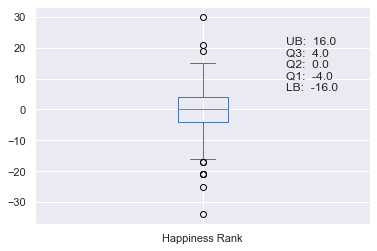

In [54]:
Q1, Q2, Q3 = np.quantile(first_term, [0.25, 0.50, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
first_term.plot(kind= 'box')
plt.text(1.25, 6,f"UB:  {upper_bound}\nQ3:  {Q3}\nQ2:  {Q2}\nQ1:  {Q1}\nLB:  {lower_bound}")
plt.show()

Values greater than 16.0 and less than -16.0 are whiskers.

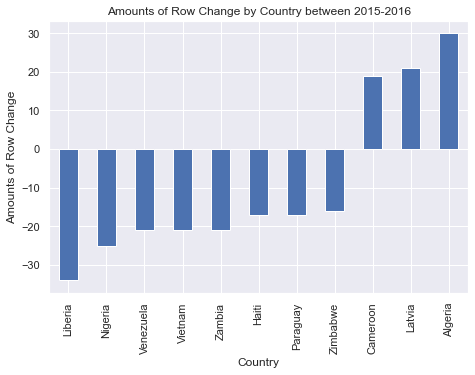

In [55]:
plt.figure(figsize=(7.5, 5))
first_term[(first_term <= lower_bound) | (first_term >= upper_bound)].sort_values().plot(kind='bar')
plt.title("Amounts of Row Change by Country between 2015-2016")
plt.ylabel("Amounts of Row Change")
plt.show()

Box plot shows the countries that have altered a lot of rankings. Algenia has advanced about 30 steps while "Libenia" has retreated more than 30 steps. We may say that significant changes are occurring in low-ranking countries. Also, there were more significant ranking drops between 2015 and 2016.

#### Q3.2) Amounts of Row Change by Country between 2016-2017

In [56]:
#Ranking change amounts between 2016 and 2017.
second_term = data_2016.set_index(["Country"])["Happiness Rank"] - data_2017.set_index([ "Country"])["Happiness Rank"]

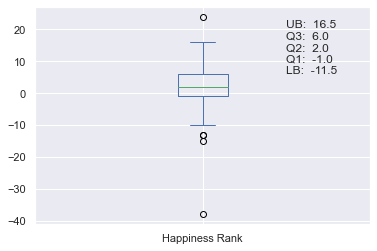

In [57]:
Q1, Q2, Q3 = np.quantile(second_term, [0.25, 0.50, 0.75])
IQR = Q3 - Q1
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)
second_term.plot(kind= 'box')
plt.text(1.25, 6,f"UB:  {upper_bound}\nQ3:  {Q3}\nQ2:  {Q2}\nQ1:  {Q1}\nLB:  {lower_bound}")
plt.show()

Values greater than 16.5 and less than -11.5 are whiskers.

ConversionError: Failed to convert value(s) to axis units: 'kf'

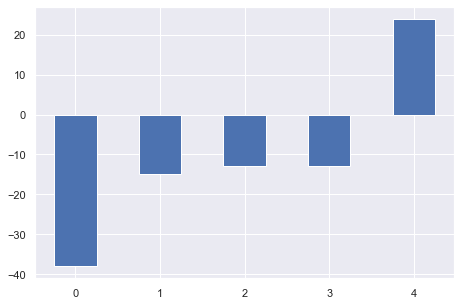

In [58]:
plt.figure(figsize=(7.5, 5))
second_term[(second_term <= lower_bound) | (second_term >= upper_bound)].sort_values().plot(kind='bar', xticks="kf")
plt.title("Amounts of Row Change by Country between 2016-2017")
plt.ylabel("Amounts of Row Change")
plt.show()

Box plot shows the countries that have altered a lot of rankings. Bulgaria has advanced about 25 steps while "Venezuela" has retreated more than 35 steps. We may say that significant changes are occurring in low-ranking countries. Also, there were more significant ranking drops. between 2015 and 2016.